0.005773502691896258
0.009837996753710412
VaR 0.01: -18472.362046696035
ES 0.01: -25327.207752539824


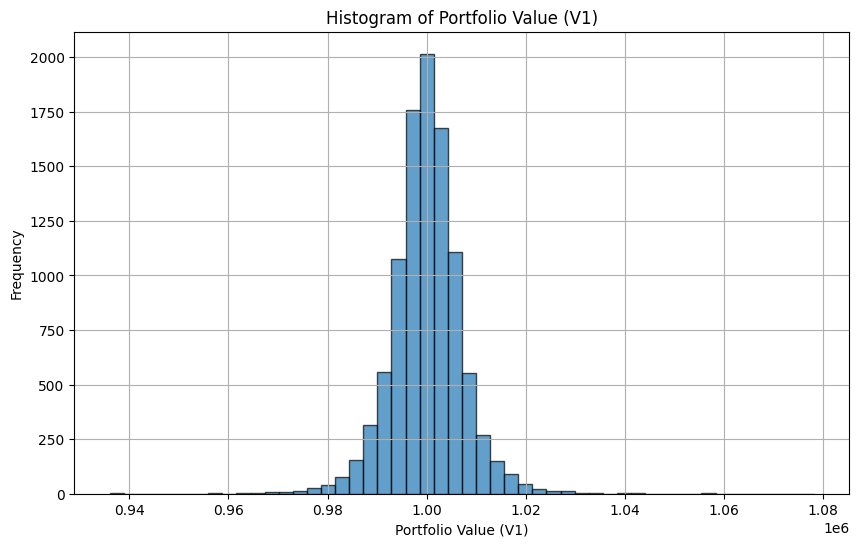

999988.3267754063
7193.792022019878


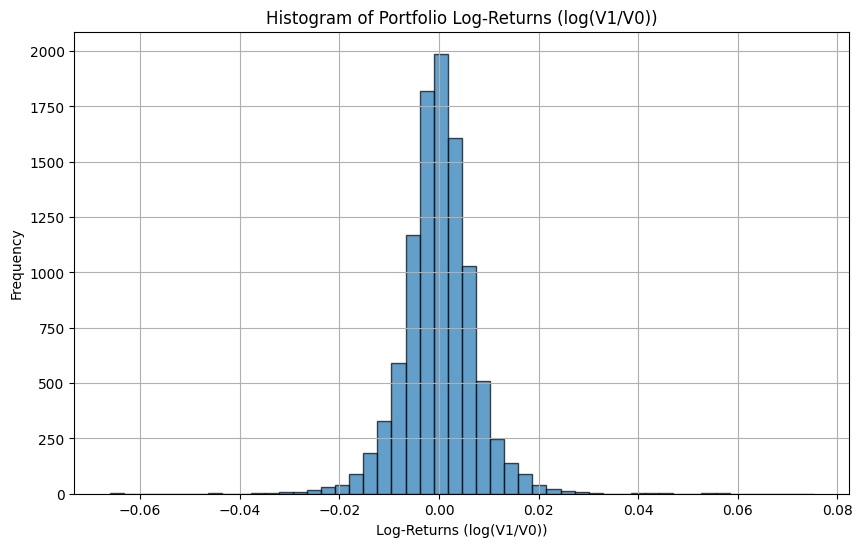

In [19]:
# Gaussian coupla 
import numpy as np
from scipy.stats import norm, t

# Parameters
n_assets = 50
n_simulations = 10000
tau = 0.4
rho = np.sin(np.pi * tau / 2)  # Convert Kendall's tau to correlation
std_dev = 0.01
dof = 3  # Degrees of freedom for t-distribution
raw_std = np.sqrt(dof / (dof - 2))

# Determine scale parameter
scale_param = std_dev / raw_std

print(scale_param)

np.random.seed(10)

# Correlation matrix
correlation_matrix = np.full((n_assets, n_assets), rho)
np.fill_diagonal(correlation_matrix, 1)

# Cholesky decomposition
L = np.linalg.cholesky(correlation_matrix)

# Step 1: Generate standard normal samples
Z = np.random.randn(n_simulations, n_assets)

# Step 2: Introduce dependency using the Cholesky factor
dependent_normals = Z @ L.T

# Step 3: Convert normals to uniform
uniforms = norm.cdf(dependent_normals)

# Step 4: Convert uniforms to t-distribution
log_returns = t.ppf(uniforms, dof) * scale_param

print(np.std(log_returns))

# Portfolio value simulation
V0 = 20000 * n_assets
P1 = 20000 * np.exp(log_returns)
V1 = np.sum(P1, axis = 1)

# Log-returns 
log_returns = np.log(V1 / V0)


# Ensure V1 and V0 are NumPy arrays
#V1 = np.array(V1)  # Portfolio values tomorrow
#V0 = np.array(V0)  # Portfolio value today (should be scalar or array with same shape as V1)

# Compute portfolio returns
portfolio_returns = V1 - V0  # This should now be an array

# Compute VaR (1st percentile of returns)
var_01 = np.percentile(portfolio_returns, 1)

# Filter returns to calculate Expected Shortfall (ES)
losses_below_var = portfolio_returns[portfolio_returns <= var_01]  # Filter returns below VaR
es_01 = np.mean(losses_below_var)  # Average of losses below VaR

# Print results
print(f"VaR 0.01: {var_01}")
print(f"ES 0.01: {es_01}")

import matplotlib.pyplot as plt

# Plot histogram of V1
plt.figure(figsize=(10, 6))
plt.hist(V1, bins=50, alpha=0.7, edgecolor='k')
plt.title('Histogram of Portfolio Value (V1)')
plt.xlabel('Portfolio Value (V1)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
print(np.mean(V1))
print(np.std(V1))



# Plot histogram of log returns
plt.figure(figsize=(10, 6))
plt.hist(log_returns, bins=50, alpha=0.7, edgecolor='k')
plt.title('Histogram of Portfolio Log-Returns (log(V1/V0))')
plt.xlabel('Log-Returns (log(V1/V0))')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()





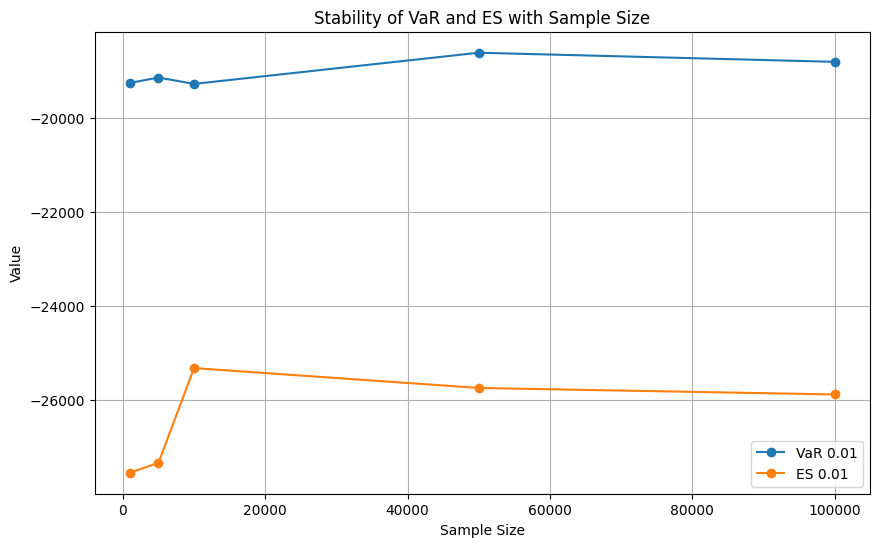

In [20]:
#Different sample sizes 
sample_sizes = [1000, 5000, 10000, 50000, 100000]
var_values = []
es_values = []

for n in sample_sizes:
    Z = np.random.randn(n, n_assets)
    dependent_normals = Z @ L.T
    uniforms = norm.cdf(dependent_normals)
    log_returns = t.ppf(uniforms, dof) * scale_param

    P1 = 20000 * np.exp(log_returns)
    V1 = np.sum(P1, axis=1)
    portfolio_returns = V1 - V0

    var_01 = np.percentile(portfolio_returns, 1)
    var_values.append(var_01)

    losses_below_var = portfolio_returns[portfolio_returns <= var_01]
    es_01 = np.mean(losses_below_var)
    es_values.append(es_01)

# Plot stability of VaR and ES
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, var_values, marker='o', label='VaR 0.01')
plt.plot(sample_sizes, es_values, marker='o', label='ES 0.01')
plt.title('Stability of VaR and ES with Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


VaR 0.01: -18209.430480893992
ES 0.01: -24893.108231138776


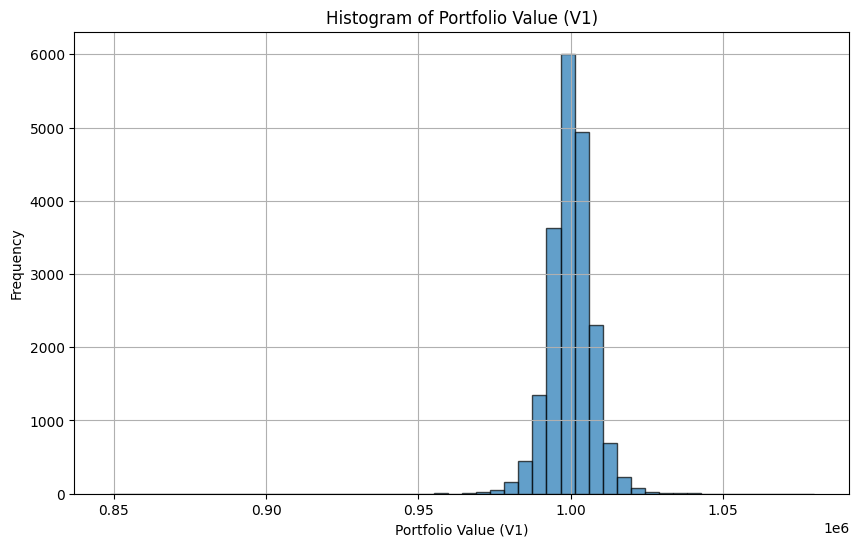

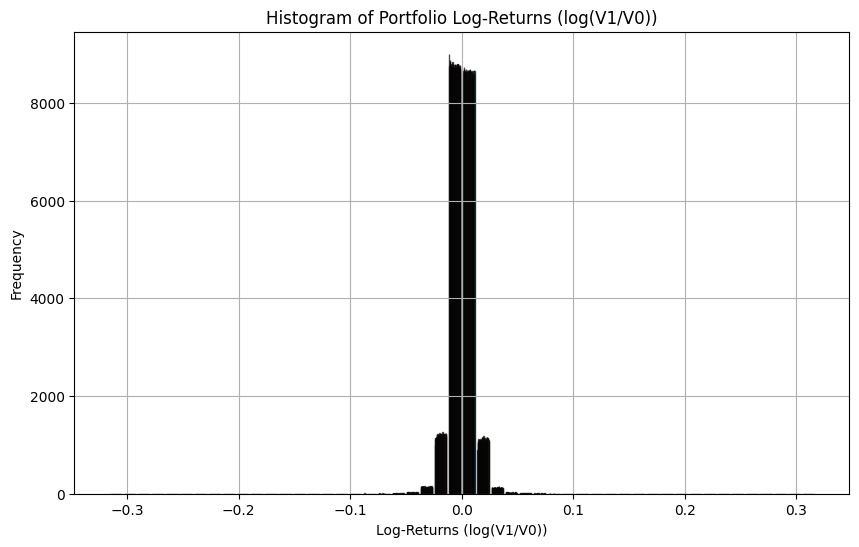

In [21]:
import numpy as np
from scipy.stats import t
# T - copula 
# Parameters
n_assets = 50
n_simulations = 20000
tau = 0.4
dof_copula = 4  # Degrees of freedom for t-copula
std_dev = 0.01
dof_marginals = 3  # Degrees of freedom for the marginals (Student's t-distribution)

# Convert Kendall's tau to correlation
rho = np.sin(np.pi * tau / 2)

# Correlation matrix
correlation_matrix = np.full((n_assets, n_assets), rho)
np.fill_diagonal(correlation_matrix, 1)

# Cholesky decomposition
L = np.linalg.cholesky(correlation_matrix)

# Step 1: Generate independent t-distributed samples for the copula
independent_t = np.random.standard_t(dof_copula, size=(n_simulations, n_assets))

# Step 2: Introduce dependency using the Cholesky factor
dependent_t = independent_t @ L.T

# Step 3: Convert t-copula marginals to uniform
uniforms = t.cdf(dependent_t, dof_copula)

# Step 4: Convert uniforms to t-distribution for log-returns
log_returns = t.ppf(uniforms, dof_marginals) * scale_param

# Portfolio value simulation
V0 = 20000 * n_assets  # Initial portfolio value
P1 = 20000 * np.exp(log_returns)  # Simulated future prices
V1 = np.sum(P1, axis=1)  # Simulated portfolio values

# Compute portfolio returns
portfolio_returns = V1 - V0  # Portfolio returns

# Compute VaR (1st percentile of returns)
var_01 = np.percentile(portfolio_returns, 1)

# Filter returns to calculate Expected Shortfall (ES)
losses_below_var = portfolio_returns[portfolio_returns <= var_01]  # Filter returns below VaR
es_01 = np.mean(losses_below_var)  # Average of losses below VaR

# Print results
print(f"VaR 0.01: {var_01}")
print(f"ES 0.01: {es_01}")

import matplotlib.pyplot as plt

# Plot histogram of V1
plt.figure(figsize=(10, 6))
plt.hist(V1, bins=50, alpha=0.7, edgecolor='k')
plt.title('Histogram of Portfolio Value (V1)')
plt.xlabel('Portfolio Value (V1)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot histogram of log returns
plt.figure(figsize=(10, 6))
plt.hist(log_returns, bins=50, alpha=0.7, edgecolor='k')
plt.title('Histogram of Portfolio Log-Returns (log(V1/V0))')
plt.xlabel('Log-Returns (log(V1/V0))')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


VaR 0.01: -23166.35361760924
ES 0.01: -33727.65266341949


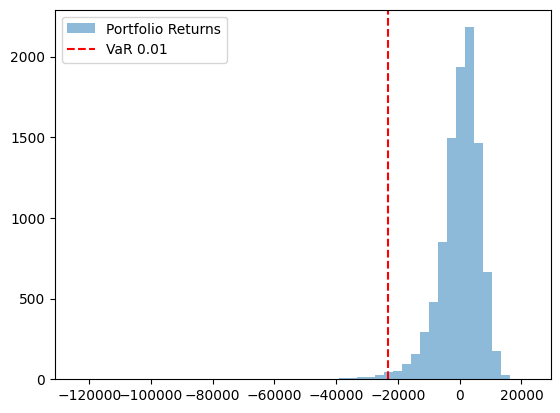

In [22]:
# Clayton coupla 

import numpy as np
from scipy.stats import t
from scipy.stats import gaussian_kde


# Parameters
n_assets = 50
n_simulations = 10000
tau = 0.4
std_dev = 0.01
dof_marginals = 3  # Degrees of freedom for the Student's t-marginals

# Convert Kendall's tau to Clayton copula parameter (theta)
theta = 2 * tau / (1 - tau)

# Step 1: Generate independent uniform samples
U = np.random.uniform(size=(n_simulations, n_assets))

# Step 2: Introduce dependency using the Clayton copula
# Simulate dependent uniforms using the Clayton copula structure
Xc = np.random.gamma(1 / theta, 1, size=(n_simulations,))  # Gamma random variables
dependent_uniforms = (-np.log(U) / Xc[:, None] + 1) ** (-1 / theta)  # Clayton copula formula
# Step 3: Convert dependent uniforms to Student's t-distribution
log_returns = t.ppf(dependent_uniforms, dof_marginals) * scale_param

# Portfolio value simulation
V0 = 20000 * n_assets  # Initial portfolio value
P1 = 20000 * np.exp(log_returns)  # Simulated future prices
V1 = np.sum(P1, axis=1)  # Simulated portfolio values 

# Compute portfolio returns
portfolio_returns = V1 - V0  # Portfolio returns

# Compute VaR (1st percentile of returns)
var_01 = np.percentile(portfolio_returns, 1)

# Filter returns to calculate Expected Shortfall (ES)
losses_below_var = portfolio_returns[portfolio_returns <= var_01]  # Filter returns below VaR
es_01 = np.mean(losses_below_var)  # Average of losses below VaR

# Print results
print(f"VaR 0.01: {var_01}")
print(f"ES 0.01: {es_01}")

import matplotlib.pyplot as plt

plt.hist(portfolio_returns, bins=50, alpha=0.5, label="Portfolio Returns")
plt.axvline(var_01, color="red", linestyle="--", label="VaR 0.01")
plt.legend()
plt.show()




VaR 0.01: -17613.837684761485
ES 0.01: -25104.447919646394


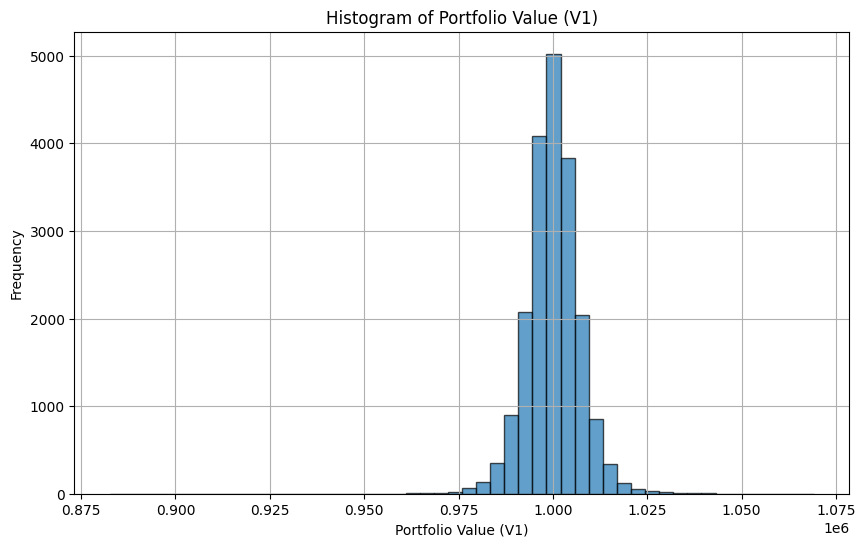

1000061.2392391077
7155.968915355666


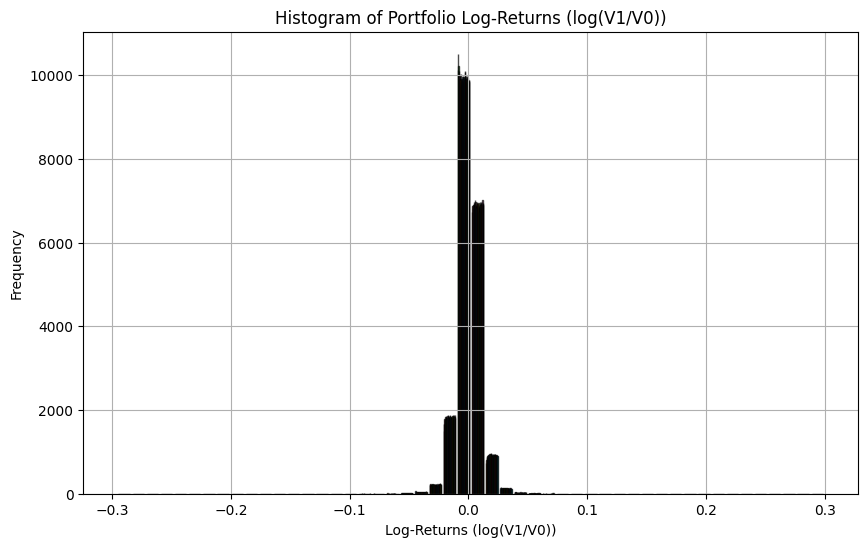

In [23]:
import numpy as np
from scipy.stats import t
# T - copula 
# Parameters
n_assets = 1
n_simulations = 10000
tau = 0.4
std_dev = 0.01
dof_marginals = 3  # Degrees of freedom for the marginals (Student's t-distribution)

# Convert Kendall's tau to correlation
rho = np.sin(np.pi * tau / 2)


# Step 1: Generate independent t-distributed
independent_t = np.random.standard_t(dof_marginals, size=(n_simulations,n_assets))

# Step 4: Convert uniforms to t-distribution for log-returns
log_returns = t.ppf(uniforms, dof_marginals) * scale_param

# Portfolio value simulation
V0 = 20000 * n_assets  # Initial portfolio value
P1 = 20000 * np.exp(log_returns)  # Simulated future prices
V1 = np.sum(P1, axis=1)  # Simulated portfolio values

# Compute portfolio returns
portfolio_returns = V1 - V0  # Portfolio returns

# Compute VaR (1st percentile of returns)
var_01 = np.percentile(portfolio_returns, 1)

# Filter returns to calculate Expected Shortfall (ES)
losses_below_var = portfolio_returns[portfolio_returns <= var_01]  # Filter returns below VaR
es_01 = np.mean(losses_below_var)  # Average of losses below VaR

# Print results
print(f"VaR 0.01: {var_01}")
print(f"ES 0.01: {es_01}")


# Plot histogram of V1
plt.figure(figsize=(10, 6))
plt.hist(V1, bins=50, alpha=0.7, edgecolor='k')
plt.title('Histogram of Portfolio Value (V1)')
plt.xlabel('Portfolio Value (V1)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
print(np.mean(V1))
print(np.std(V1))



# Plot histogram of log returns
plt.figure(figsize=(10, 6))
plt.hist(log_returns, bins=50, alpha=0.7, edgecolor='k')
plt.title('Histogram of Portfolio Log-Returns (log(V1/V0))')
plt.xlabel('Log-Returns (log(V1/V0))')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Plot histogram of V1
plt.figure(figsize=(10, 6))
plt.hist(V1, bins=50, alpha=0.7, edgecolor='k')
plt.title('Histogram of Portfolio Value (V1) - Single Asset')
plt.xlabel('Portfolio Value (V1)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot histogram of log-returns
plt.figure(figsize=(10, 6))
plt.hist(portfolio_log_returns, bins=50, alpha=0.7, edgecolor='k')
plt.title('Histogram of Portfolio Log-Returns (log(V1/V0)) - Single Asset')
plt.xlabel('Log-Returns (log(V1/V0))')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
